In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
colors = ['black', 'grey', 'brown', 'red', 'darkorange', 'gold','yellow','green','cyan','royalblue','indigo','violet','deeppink','tan','olive','maroon']
#colors = ['royalblue', 'red', 'deeppink', 'maroon', 'mediumorchid', 'tan', 'forestgreen', 'olive', 'goldenrod', 'lightcyan', 'navy', 'black']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

In [3]:
import pandas as pd
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/EE626P_PGP/full_eeg.csv', usecols=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
data

,F3,FC5,AF3,F7,T7,P7,O1,O2,P8,T8,F8,AF4,FC6,F4,Label
0,4372.051270,4224.358887,4246.538574,4318.589844,4199.358887,4258.717773,4276.153809,4250.769043,4130.641113,4191.794922,4282.436035,4247.948730,4152.948730,4315.641113,goose
1,4366.538574,4218.333496,4230.897461,4307.563965,4200.384766,4265.000000,4273.717773,4247.307617,4124.487305,4192.051270,4292.820312,4244.615234,4153.589844,4308.461426,goose
2,4361.922852,4213.589844,4216.538574,4295.256348,4200.384766,4264.358887,4270.256348,4240.897461,4120.384766,4185.384766,4299.487305,4237.563965,4155.897461,4302.948730,goose
3,4359.743652,4212.307617,4212.179688,4289.743652,4199.230957,4257.307617,4266.922852,4234.358887,4119.102539,4174.102539,4297.307617,4224.871582,4156.538574,4301.666504,goose
4,4358.717773,4214.102539,4220.512695,4293.589844,4197.563965,4248.077148,4264.743652,4230.000000,4119.230957,4163.974121,4286.282227,4206.410156,4153.717773,4303.974121,goose
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860155,4267.563965,4281.282227,4271.410156,4240.897461,4256.410156,4252.948730,4284.358887,4280.769043,4280.897461,4296.410156,4270.897461,4296.666504,4251.922852,4216.153809,s
860156,4267.179688,4276.282227,4271.538574,4250.128418,4255.897461,4255.897461,4285.897461,4281.282227,4282.692383,4299.487305,4274.615234,4297.051270,4258.205078,4217.563965,s
860157,4264.743652,4268.974121,4270.641113,4259.358887,4257.307617,4254.358887,4283.589844,4280.641113,4282.436035,4301.666504,4275.384766,4296.410156,4263.717773,4218.333496,s
860158,4261.410156,4264.358887,4269.743652,4264.743652,4259.358887,4249.615234,4278.974121,4278.461426,4280.000000,4301.538574,4273.974121,4296.025879,4265.384766,4217.307617,s


In [4]:
i = 0
label_dict = {'p':0, 't': 1, 'k': 2, 'f': 3, 's': 4, 'sh': 5, 'v': 6, 'z': 7, 'zh': 8, 'm': 9, 'n': 10, 'ng': 11 ,'ng': 12, 'fleece': 13, 'goose': 14, 'trap': 15,'thought':16}
cols = [str(x) for x in range(3584)]
final_data = pd.DataFrame(columns=cols)
final_temp = []
y_train = []
temp = []
for index, row in data.iterrows():
    i += 1
    temp.extend([row['F3'], row['FC5'], row['AF3'], row['F7'], row['T7'], row['P7'], row['O1'], row['O2'], row['P8'], row['T8'], row['F8'], row['AF4'], row['FC6'], row['F4']])
    if i == 256:
        y_train.append(label_dict[row['Label']])
        final_data.loc[len(final_data)] = temp
        temp = []
        i = 0

In [5]:
pca = PCA(n_components=3)
X_PCA=pca.fit_transform(final_data)

In [6]:
final_data.shape

(3360, 3584)

In [7]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3,perplexity=100, random_state=42)
X_100 = tsne.fit_transform(final_data)

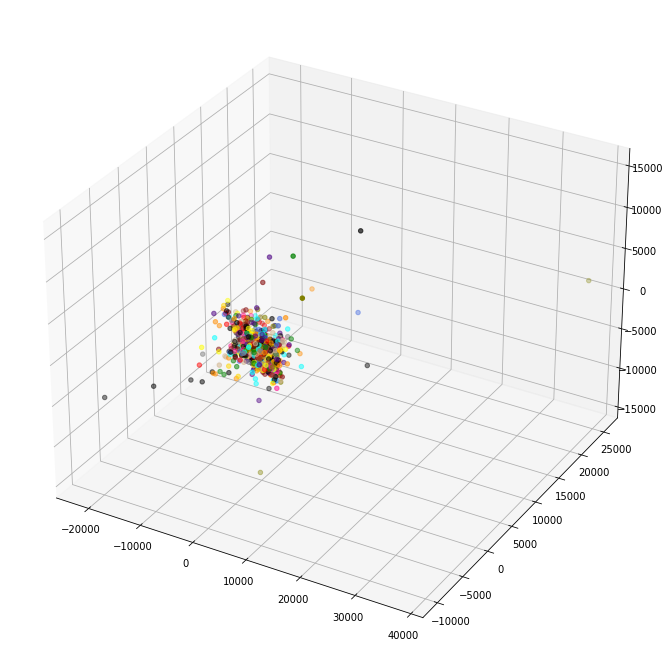

In [8]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_PCA[:,0], X_PCA[:,1], X_PCA[:,2], c=vectorizer(y_train), label=colors)
plt.show()

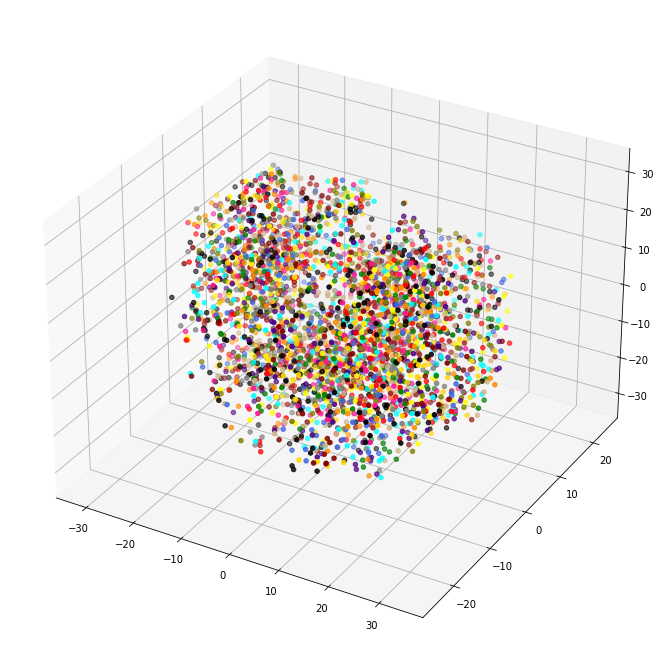

In [9]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_100[:,0], X_100[:,1], X_100[:,2], c=vectorizer(y_train), label=colors)
plt.show()

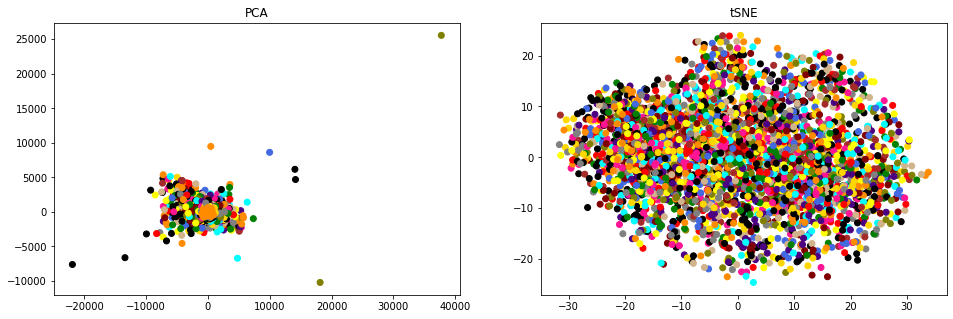

In [10]:
plt.figure(figsize=(16, 5))
ax1=plt.subplot(121)
plt.gca().set_title('PCA')
scatter=plt.scatter(X_PCA[:,0], X_PCA[:,1], c=vectorizer(y_train),label=colors)
ax2=plt.subplot(122)
plt.gca().set_title('tSNE')
plt.scatter(X_100[:,0], X_100[:,1], c=vectorizer(y_train),label=y_train)